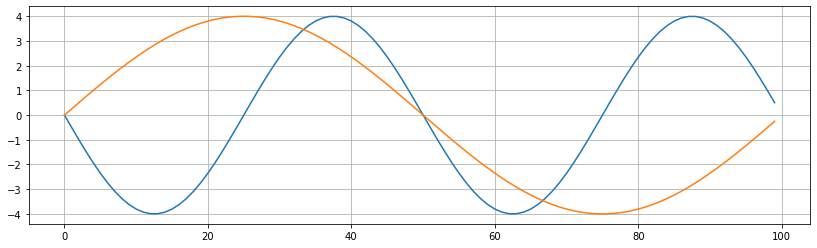

In [15]:
# pulsem 2022-23
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk

# --- 2 --- 
n = np.arange(100)
x1 = 4 * np.cos(2 * 2 * np.pi / 100 * n + np.pi/2)
x2 = 4 * np.cos(    2 * np.pi / 100 * n - np.pi/2)
plt.figure(figsize=(14,4))
plt.plot(n,x1)
plt.plot(n,x2)
plt.gca().grid()


In [50]:
# --- 4 ---- 
x = [1,1,0,0]
print(np.fft.fft(x))
x = [1,-1,0,0]
print(np.fft.fft(x))

[2.+0.j 1.-1.j 0.+0.j 1.+1.j]
[0.+0.j 1.+1.j 2.+0.j 1.-1.j]


In [51]:
# ---5 posun ---
k = 1
Xk = 1j
m = 2
Yk = Xk * np.exp (-1j * 2 * np.pi / 8 * k * m)
print(Yk)
m = 4
Yk = Xk * np.exp (-1j * 2 * np.pi / 8 * k * m)
print(Yk)


(1+6.123233995736766e-17j)
(1.2246467991473532e-16-1j)


In [6]:
# --- 7 konvoluce --- 
x = [1 , 1 , 0 , -1] 
h = [1 ,-1 , 0, 3]
print (np.convolve(x,h))
h = [1 ,-1 , 0, -3]
print (np.convolve(x,h))


[ 1  0 -1  2  4  0 -3]
[ 1  0 -1 -4 -2  0  3]


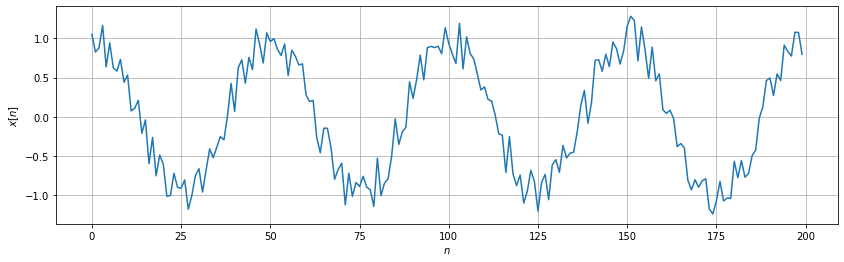

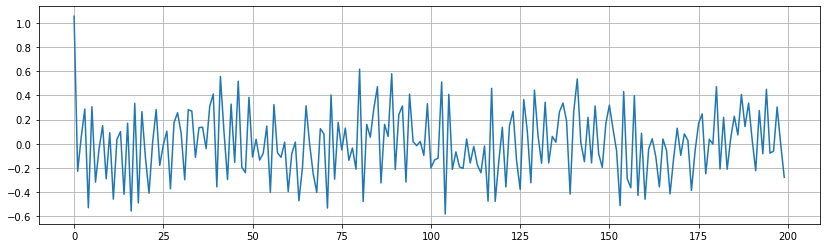

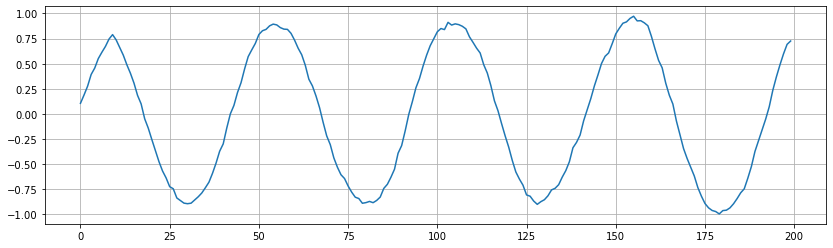

In [55]:
# --- 8--- signal k filtraci 
n = np.arange(200)
x = np.cos(2*np.pi * n * 4 / 200) + np.random.uniform(-0.3,0.3,200)
fig = plt.figure(figsize=(14,4))
plt.plot(n,x)
plt.gca().grid()
plt.gca().set_ylabel('$x[n]$')
plt.gca().set_xlabel('$n$')
fig.savefig('8.eps')

h = [1, -1]
y = lfilter(h,1,x)
fig = plt.figure(figsize=(14,4))
plt.plot(n,y)
plt.gca().grid()

h = 0.1 * np.ones(10)
y = lfilter(h,1,x)
fig = plt.figure(figsize=(14,4))
plt.plot(n,y)
plt.gca().grid()


[ 1.   -0.01 -0.99] [1.     0.     0.9801]
100.00126258640816
0.011834269931799616
(6.123233995736766e-17+1j) 100.00126258640822
(-1+1.2246467991473532e-16j) 0.010100499974748758


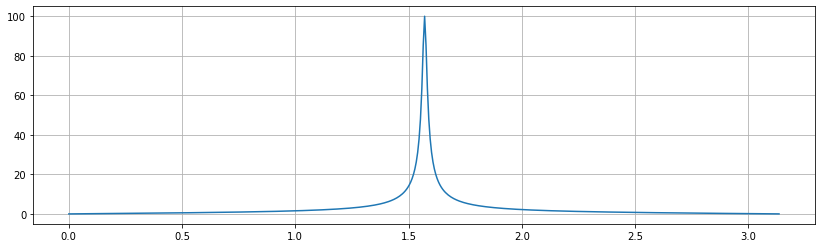

In [30]:
# --- 10 --- 
n1 = -0.99
n2 = 1
p1 = 0.99*1j
p2 = -0.99*1j
b = np.poly([n1,n2])
a = np.poly([p1,p2])
print(b,a)
om,H = freqz(b,a,512)
fig = plt.figure(figsize=(14,4))
plt.plot(om,np.abs(H))
plt.gca().grid()

print(np.abs(H[256]))
print(np.abs(H[-1]))
# by hand 
ejo = np.exp(1j * np.pi / 2)
absH = np.abs(ejo-n1) * np.abs(ejo-n2) / np.abs(ejo-p1) / np.abs(ejo-p2)
print(ejo, absH)
ejo = np.exp(1j * np.pi)
absH = np.abs(ejo-n1) * np.abs(ejo-n2) / np.abs(ejo-p1) / np.abs(ejo-p2)
print(ejo, absH)


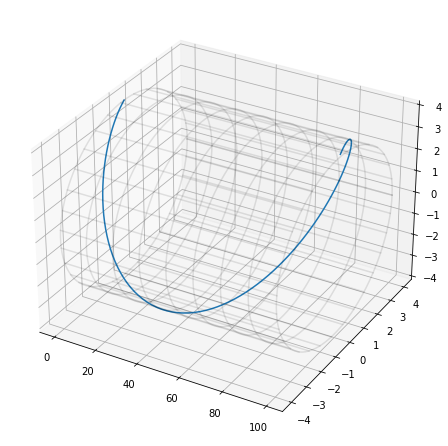

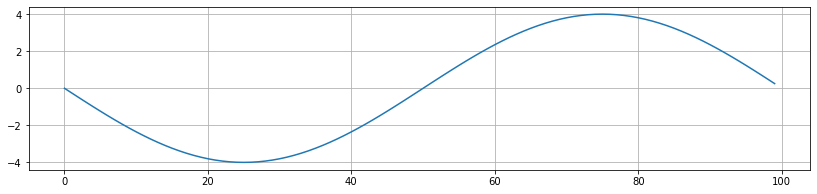

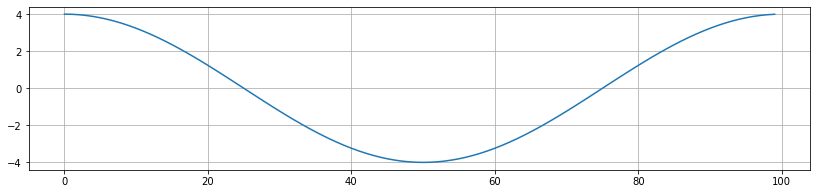

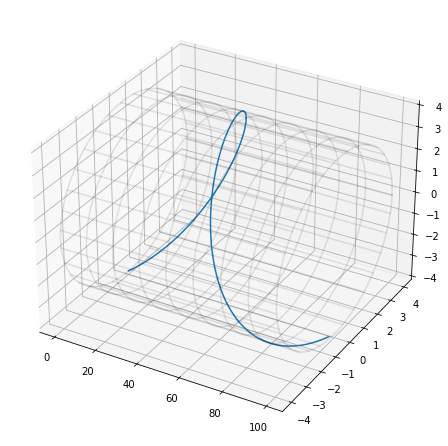

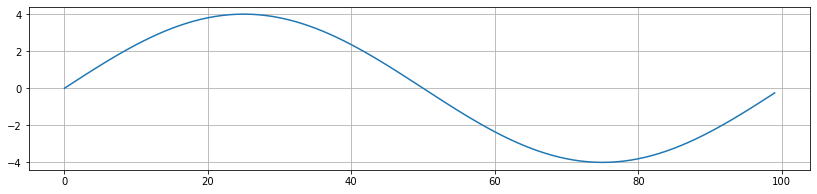

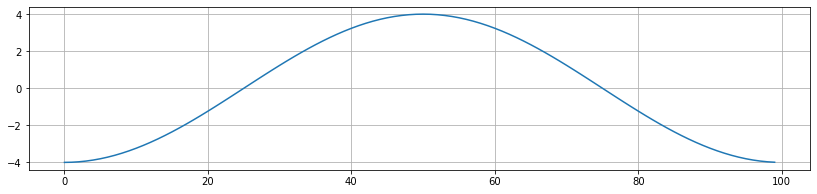

In [37]:
# ======================== C and D ! ======================================================
# priklad 1 komplex exp 
from mpl_toolkits import mplot3d
import mpl_toolkits.mplot3d.art3d as art3d

def complex_cylinder(t1, t2, r, fig):
    '''kresli sedy drateny valec ve 3d tak, aby byla dobre videt komplexni exponenciala. 
    t1 je pocatecni cas
    t2 je koncovy cas 
    r je polomer
    fig je obrazek'''
    phi = np.linspace(0,2 * np.pi,100)
    t = np.linspace(t1,t2,9)
    kolo = r * np.exp(1j * phi)
    for tt in t: 
        fig.plot3D(tt * np.ones(phi.shape), np.real(kolo), np.imag(kolo),color='k',alpha=0.1)
    phi = np.linspace(0,2 * np.pi,32)
    kolo = r * np.exp(1j * phi)
    for z in kolo:        
        line=art3d.Line3D(*zip((t1,np.real(z),np.imag(z)), (t2,np.real(z),np.imag(z))), markevery=(1, 1), color='k',alpha=0.1)
        ax.add_line(line)   

# --- 
n = np.arange(100) 
x = 4 * np.exp(1j * np.pi / 2 )* np.exp(1j * 2 * np.pi / 100 * n )
fig=plt.figure(figsize=(6,6))
ax = fig.add_axes((0,0,1,1),projection="3d")
ax.plot3D(n, np.real(x), np.imag(x))
complex_cylinder(0,100,4,ax)
plt.figure(figsize=(14,3))
plt.plot(n,np.real(x))
plt.gca().grid()
plt.figure(figsize=(14,3))
plt.plot(n,np.imag(x))
plt.gca().grid()
                                        
# --- 
n = np.arange(100) 
x = 4 * np.exp(-1j * np.pi / 2 )* np.exp(1j * 2 * np.pi / 100 * n )
fig=plt.figure(figsize=(6,6))
ax = fig.add_axes((0,0,1,1),projection="3d")
ax.plot3D(n, np.real(x), np.imag(x))
complex_cylinder(0,100,4,ax)
plt.figure(figsize=(14,3))
plt.plot(n,np.real(x))
plt.gca().grid()
plt.figure(figsize=(14,3))
plt.plot(n,np.imag(x))
plt.gca().grid()


In [39]:
# --- 4 ---- 
x = [1,0,-1,0,0,0,0,0]
print(np.fft.fft(x))

[0.+0.j 1.+1.j 2.+0.j 1.-1.j 0.+0.j 1.+1.j 2.+0.j 1.-1.j]


In [56]:
# ---5 posun ---
k = 1
Xk = 1j
m = 1
Yk = Xk * np.exp (-1j * 2 * np.pi / 8 * k * m)
print(Yk)
m = 3
Yk = Xk * np.exp (-1j * 2 * np.pi / 8 * k * m)
print(Yk)


(0.7071067811865476+0.7071067811865476j)
(0.7071067811865476-0.7071067811865475j)


In [44]:
# --- 7 konvoluce --- 
x = [1 , 1 , -1] 
h = [1 ,-1 , 3]
print (np.convolve(x,h))
h = [1 ,-1 , -3]
print (np.convolve(x,h))


[ 1  0  1  4 -3]
[ 1  0 -5 -2  3]


[1. 0. 1.] [ 1.      0.     -0.9801]
6.18477248193199e-17
85.77847466740394
(6.123233995736766e-17+1j) 6.184772481931989e-17
(-1+1.2246467991473532e-16j) 100.50251256281399


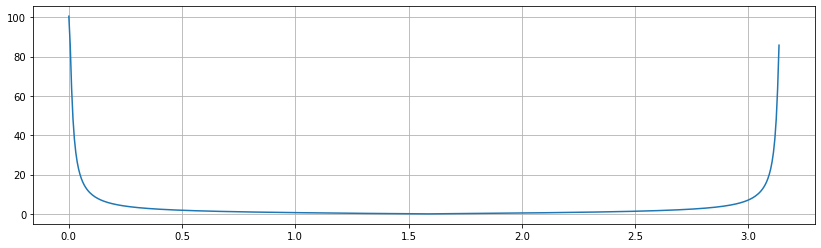

In [49]:
# --- 10 --- 
n1 = 1j
n2 = -1j
p1 = -0.99
p2 = 0.99
b = np.poly([n1,n2])
a = np.poly([p1,p2])
print(b,a)
om,H = freqz(b,a,512)
fig = plt.figure(figsize=(14,4))
plt.plot(om,np.abs(H))
plt.gca().grid()

print(np.abs(H[256]))
print(np.abs(H[-1]))
# by hand 
ejo = np.exp(1j * np.pi / 2)
absH = np.abs(ejo-n1) * np.abs(ejo-n2) / np.abs(ejo-p1) / np.abs(ejo-p2)
print(ejo, absH)
ejo = np.exp(1j * np.pi)
absH = np.abs(ejo-n1) * np.abs(ejo-n2) / np.abs(ejo-p1) / np.abs(ejo-p2)
print(ejo, absH)
